In [59]:
import numpy as np
from pycapacity.algorithms import iterative_convex_hull_method
from pycapacity.objects import Polytope
from pycapacity.visual import plot_polytope
import matplotlib.pyplot as plt
from timeit import default_timer
from scipy.spatial.distance import directed_hausdorff

In [60]:
np.random.seed(4)

p, n, m = 2, 7, 50
J = np.random.uniform(-5,5,size=(p, n))
N = np.random.uniform(-1,1, size=(n, m))
t_max = np.random.uniform(400,800,size=m)
t_min = np.random.uniform(0,100,size=m)

s = default_timer()
res1 = iterative_convex_hull_method(J.T, N, t_min, t_max, tol=5)
print(default_timer() - s)


s = default_timer()
res2 = iterative_convex_hull_method(J.T, N, t_min, t_max, tol=1)
print(default_timer() - s)

0.048108199989655986
0.0725529000046663


In [61]:
v1 = res1[0]
v2 = res2[0]

print(v1.shape, v2.shape)

def hausdorff_distance(v1, v2):
    return np.max([directed_hausdorff(v1, v2)[0], directed_hausdorff(v2, v1)[0]])

print(hausdorff_distance(v1.T, v2.T))

(2, 32) (2, 50)
97.17334043074314


Visual: no faces found, calculating faces
Visual: no faces found, calculating faces


C:\Users\glaisne\AppData\Local\Temp\ipykernel_19364\379056392.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([-1000, -750, -500, -250, 0, 250, 500, 750, 1000])
C:\Users\glaisne\AppData\Local\Temp\ipykernel_19364\379056392.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([-1000, None, -500, None, 0, None, 500, None, 1000])
C:\Users\glaisne\AppData\Local\Temp\ipykernel_19364\379056392.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([-1000, None, -500, None, 0, None, 500, None, 1000])


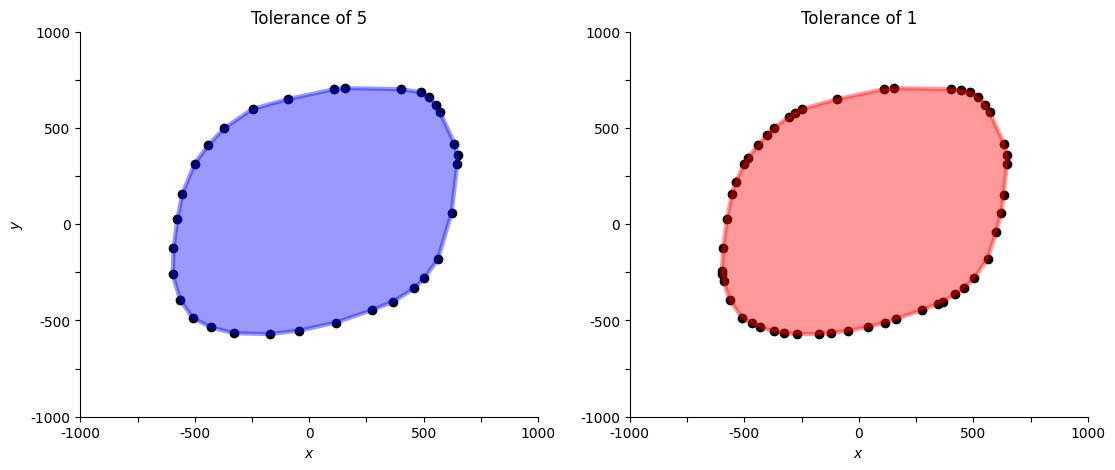

In [65]:
%matplotlib inline

fig = plt.figure(figsize=(13,5))

ax1 = fig.add_subplot(121) #, projection='3d')

P = Polytope(vertices=res1[0])
plot_polytope(P, ax1, edge_color="blue", face_color="blue") #, alpha=0.2)


ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_xlim(-1000,1000)
ax1.set_ylim(-1000,1000)
# ax1.set_xticklabels([1,2,3])
ax1.set_xticklabels([-1000, -750, -500, -250, 0, 250, 500, 750, 1000])
ax1.set_xticklabels([-1000, None, -500, None, 0, None, 500, None, 1000])
ax1.set_yticklabels([-1000, None, -500, None, 0, None, 500, None, 1000])

ax2 = fig.add_subplot(122) #, projection='3d')

P = Polytope(vertices=res2[0])
plot_polytope(P, ax2, edge_color="red", face_color="red") #, alpha=0.2)


ax2.set_xlabel(r'$x$')
# ax2.set_ylabel(r'$y$')


ax2.sharex(ax1)
ax2.sharey(ax1)
# ax2.set_yticks([])
# ax.set_zlim(-1000,1000)

ax1.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

ax1.set_title(r"Tolerance of 5")
ax2.set_title(r"Tolerance of 1")

# fig.tight_layout()
# plt.show()
plt.savefig("chapter_4_hausdorff_sensitivity_1.pdf", format="pdf")

In [57]:
np.random.seed(5)
p, n, m = 2, 4, 7
J = np.random.uniform(-5,5,size=(p, n))
N = np.random.uniform(-1,1, size=(n, m))
t_max = np.random.uniform(0,200,size=m)
t_min = np.random.uniform(-100,0,size=m)

s = default_timer()
res1 = iterative_convex_hull_method(J.T, N, t_min, t_max, tol=1)
print(default_timer() - s)

np.random.seed(22)
p, n, m = 2, 4, 7
J = np.random.uniform(-5,5,size=(p, n))
N = np.random.uniform(-1,1, size=(n, m))
t_max = np.random.uniform(0,200,size=m)
t_min = np.random.uniform(-100,0,size=m)

s = default_timer()
res2 = iterative_convex_hull_method(J.T, N, t_min, t_max, tol=1)
print(default_timer() - s)

v1 = res1[0]
v2 = res2[0]

print(v1.shape, v2.shape)

print(hausdorff_distance(v1.T, v2.T))

0.004524599993601441
0.004973300005076453
(2, 9) (2, 10)
57.83210292976019
